In [1]:
from pyhdf.SD import SD, SDC

file_name = 'MOD06_L2.A2017001.0115.061.2017312163804.hdf5'
file = SD(file_name, SDC.READ)

In [2]:
print(file.info())

(127, 14)


In [3]:
datasets_dic = file.datasets()

for idx,sds in enumerate(datasets_dic.keys()):
    print(idx,sds)

0 Latitude
1 Longitude
2 Scan_Start_Time
3 Solar_Zenith
4 Solar_Zenith_Day
5 Solar_Zenith_Night
6 Solar_Azimuth
7 Solar_Azimuth_Day
8 Solar_Azimuth_Night
9 Sensor_Zenith
10 Sensor_Zenith_Day
11 Sensor_Zenith_Night
12 Sensor_Azimuth
13 Sensor_Azimuth_Day
14 Sensor_Azimuth_Night
15 Brightness_Temperature
16 Surface_Temperature
17 Surface_Pressure
18 Cloud_Height_Method
19 Cloud_Top_Height
20 Cloud_Top_Height_Nadir
21 Cloud_Top_Height_Nadir_Day
22 Cloud_Top_Height_Nadir_Night
23 Cloud_Top_Pressure
24 Cloud_Top_Pressure_Nadir
25 Cloud_Top_Pressure_Night
26 Cloud_Top_Pressure_Nadir_Night
27 Cloud_Top_Pressure_Day
28 Cloud_Top_Pressure_Nadir_Day
29 Cloud_Top_Temperature
30 Cloud_Top_Temperature_Nadir
31 Cloud_Top_Temperature_Night
32 Cloud_Top_Temperature_Nadir_Night
33 Cloud_Top_Temperature_Day
34 Cloud_Top_Temperature_Nadir_Day
35 Tropopause_Height
36 Cloud_Fraction
37 Cloud_Fraction_Nadir
38 Cloud_Fraction_Night
39 Cloud_Fraction_Nadir_Night
40 Cloud_Fraction_Day
41 Cloud_Fraction_Nadir_D

In [4]:


# Read dataset.
DATAFIELD_NAME='Cloud_Top_Pressure_Infrared'
data3D = file.select(DATAFIELD_NAME)
print(data3D[:,:].shape)
# print (data3D[:] != 127).any()


(406, 270)


In [5]:
# Read geolocation dataset.
lat = file.select('Latitude')
latitude = lat[:,:]
lon = file.select('Longitude')
longitude = lon[:,:]

In [11]:
latitude.mean()

-48.640587

Text(0.5,1,'Map of Cloud_Top_Pressure_Infrared')

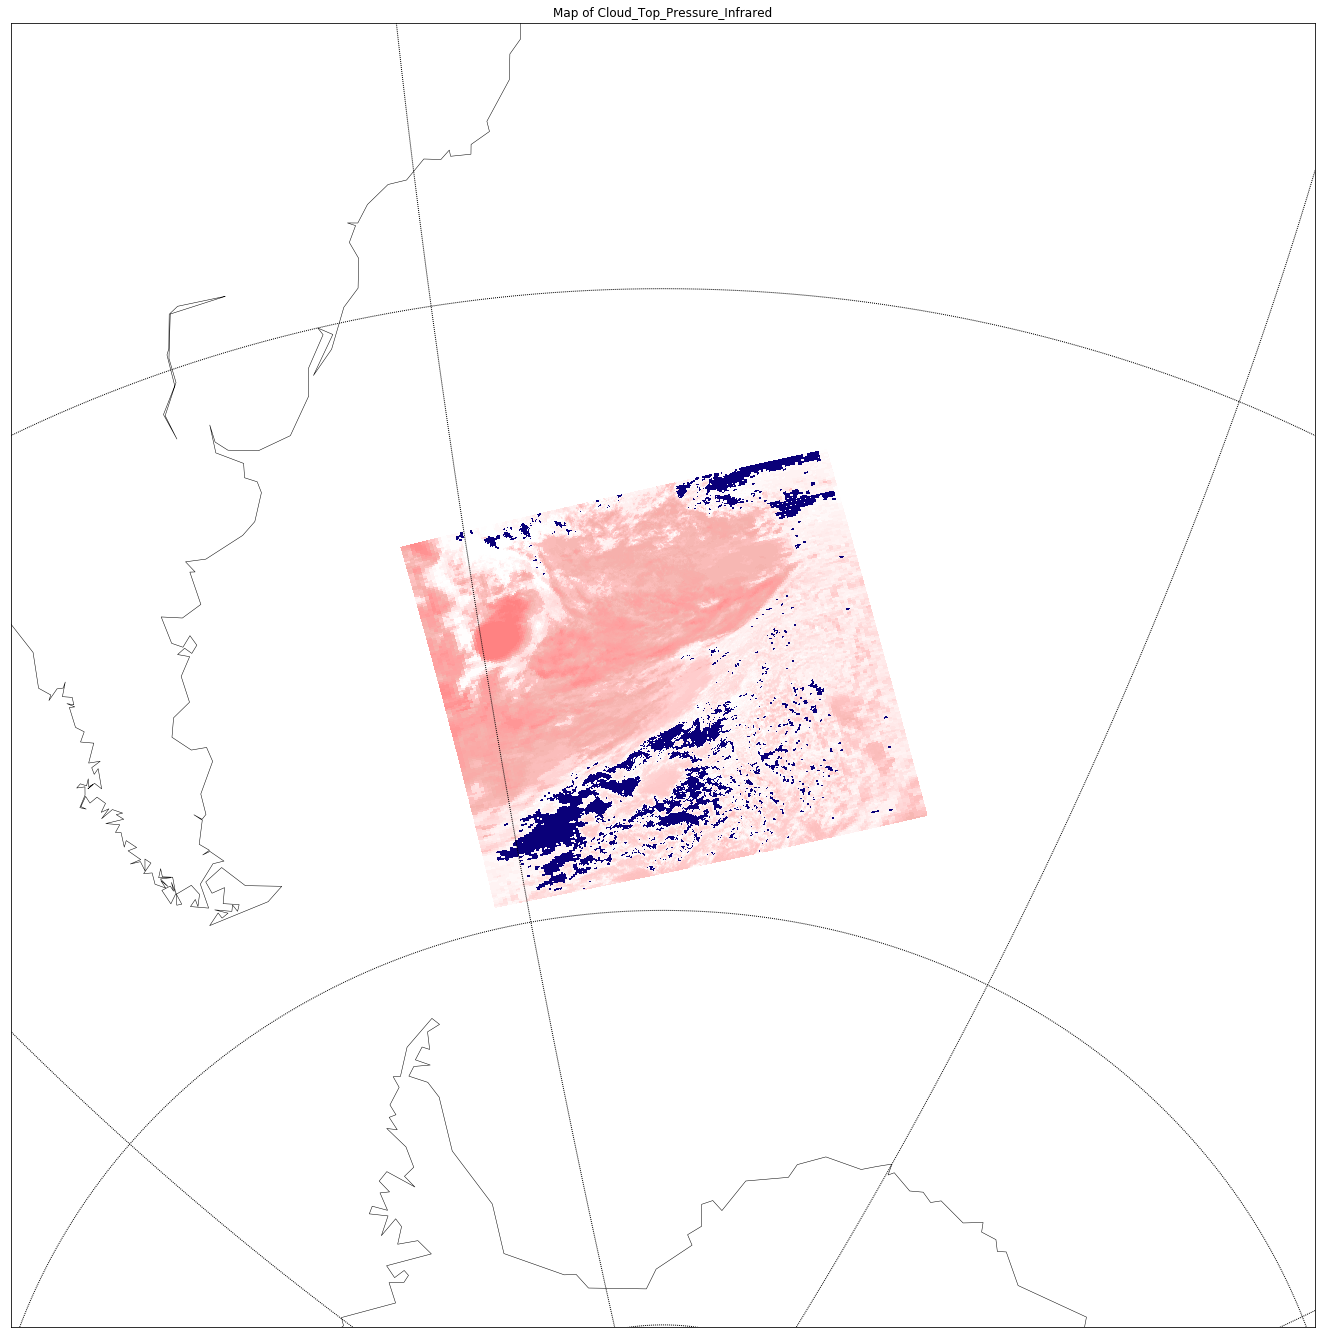

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
import numpy as np

import statistics

plt.figure(figsize=(48,24))

# m = Basemap(projection='cyl', resolution='l', llcrnrlat=-90, urcrnrlat = 90, llcrnrlon=-180, urcrnrlon = 180)
width = 28000000/4; lon_0 = longitude.mean(); lat_0 = latitude.mean()
m = Basemap(width=width,height=width,projection='aeqd',
            lat_0=lat_0,lon_0=lon_0)

m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90., 120., 30.))#, labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180., 181., 45.))#, labels=[0, 0, 0, 1])
x, y = m(longitude, latitude)
m.pcolormesh(x, y, data3D[:,:], cmap=cm.GMT_haxby)
plt.title('Map of %s' % DATAFIELD_NAME)